In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

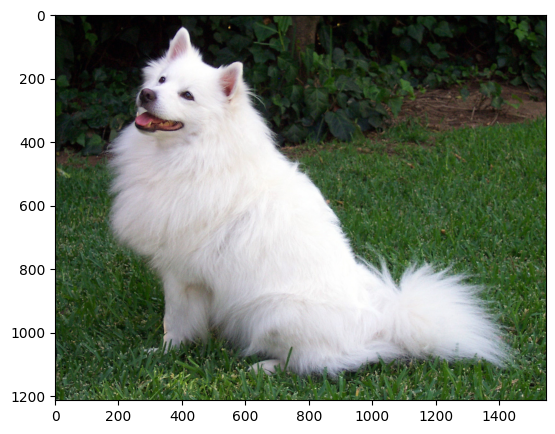

In [74]:
img=cv2.imread("../img/dog.jpg")

plt.figure(figsize=(14, 5))
# BGR to RGB [..., ::-1]
plt.imshow(img[..., ::-1])
plt.show()

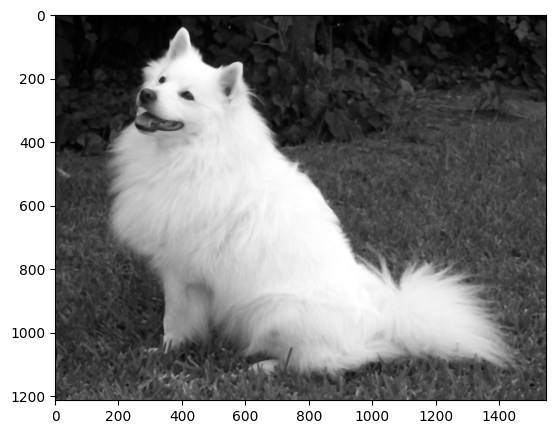

In [87]:
imgGray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
imgBlurMedian=cv2.medianBlur(imgGray,7)

plt.figure(figsize=(14, 5))
# BGR to RGB [..., ::-1]
plt.imshow(imgBlurMedian,cmap="grey")
plt.show()

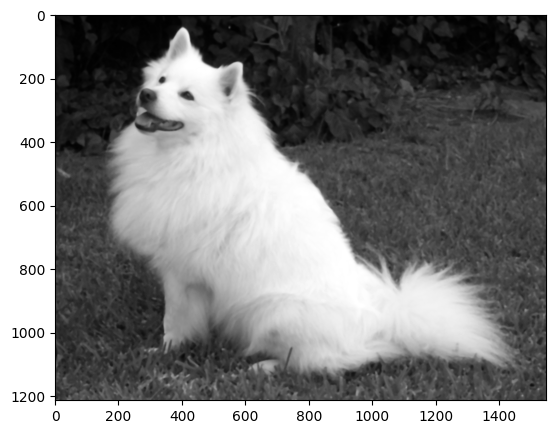

In [76]:
imgBlurGaussian=cv2.GaussianBlur(imgBlurMedian,(5,5),1.4)

plt.figure(figsize=(14, 5))
# BGR to RGB [..., ::-1]
plt.imshow(imgBlurGaussian,cmap="grey")
plt.show()

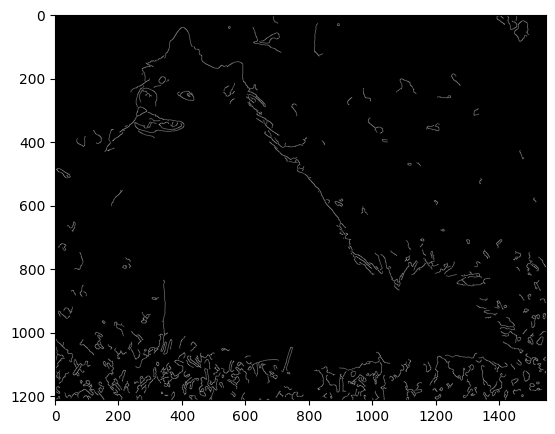

In [90]:
imgEdges = cv2.Canny(imgBlurGaussian,20,100)

plt.figure(figsize=(14, 5))
# BGR to RGB [..., ::-1]
plt.imshow(imgEdges,cmap="grey")
plt.show()

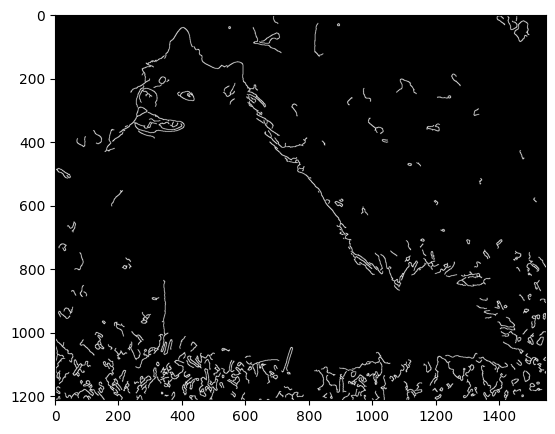

In [91]:
kernel = np.ones((2, 2), np.uint8)
imgDilation = cv2.dilate(imgEdges, kernel, iterations=1)

plt.figure(figsize=(14, 5))
# BGR to RGB [..., ::-1]
plt.imshow(imgDilation,cmap="grey")
plt.show()

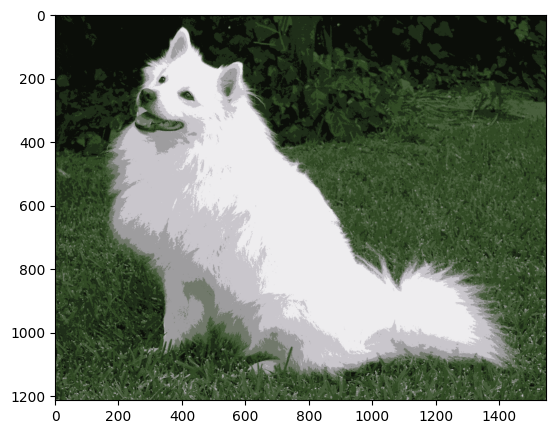

In [92]:
data = np.float32(img)
data = data.reshape((-1, 3))

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER,50, 0.2)
compactness, labels, centers = cv2.kmeans(data, 8, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
centers = np.uint8(centers)
segmentedImg = centers[labels.flatten()]
segmentedImg = segmentedImg.reshape(img.shape)

plt.figure(figsize=(14, 5))
# BGR to RGB [..., ::-1]
plt.imshow(segmentedImg[..., ::-1])
plt.show()

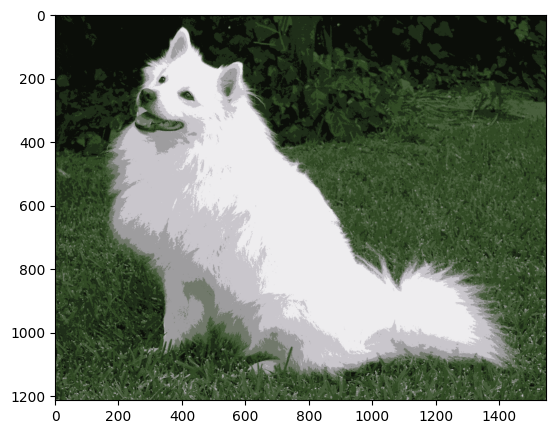

In [93]:
imgBlurBilateral=cv2.bilateralFilter(segmentedImg,9,9,7)

plt.figure(figsize=(14, 5))
# BGR to RGB [..., ::-1]
plt.imshow(imgBlurBilateral[..., ::-1])
plt.show()

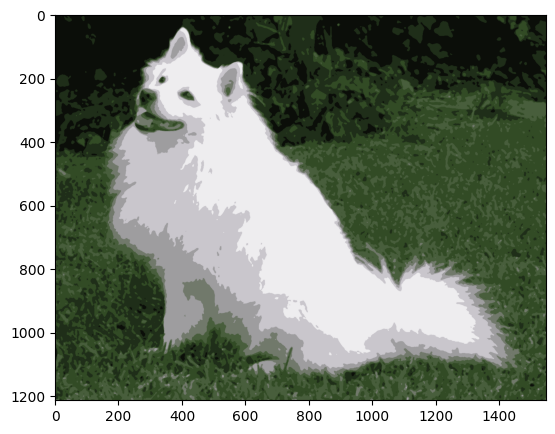

In [94]:
imgBlurBilateralMedian=cv2.medianBlur(imgBlurBilateral,7)

plt.figure(figsize=(14, 5))
# BGR to RGB [..., ::-1]
plt.imshow(imgBlurBilateralMedian[..., ::-1])
plt.show()

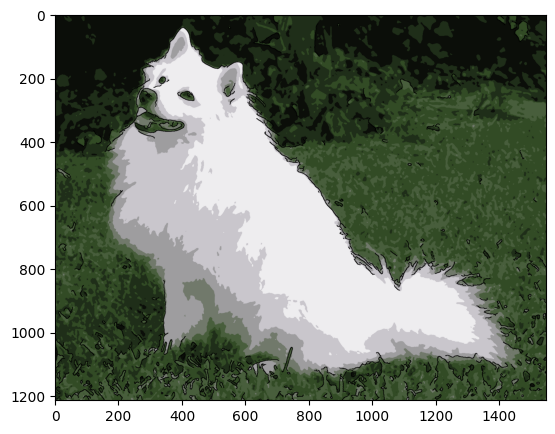

In [95]:
cartoonized_img = cv2.bitwise_and(imgBlurBilateralMedian, imgBlurBilateralMedian, mask = ~imgDilation) 

plt.figure(figsize=(14, 5))
# BGR to RGB [..., ::-1]
plt.imshow(cartoonized_img[..., ::-1])
plt.show()